<a href="https://colab.research.google.com/github/mariaclira/dados_chuvas/blob/main/datalogger1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import openpyxl


- Passo 1: base de dados (github) importada;
- Passo 2: limpeza dos dados (organização em tabelas)
- Passo 3: interpretação dos dados
- Passo 4: separar apenas as chuvas intensas.
- Passo 5:
- Passo 6:
- Passo 7:

In [11]:
#BD suja recebida do CPRM - direto do datalogger dos pluviógrafos
url = 'https://raw.githubusercontent.com/mariaclira/dados_chuvas/main/Datalogger1_verif_2014.11.19.csv'
dados = pd.read_csv(url, sep = ";")


In [12]:
pd.DataFrame.head(dados, n=15)

,iLink Unload File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,iLink Version,3.115.0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logger Type,iRIS 150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Logger Serial Number,AG3-1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Logger Firmware Version,Vj/1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Logger Software Version,V1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Unload File Format,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Unload File Order,Chronological,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unload file created,02/05/2015,10:13:48,NaN,NaN,NaN,NaN,NaN,NaN
8,Site Name,845004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Start Of Data Ptr,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
info_datalogger = pd.DataFrame(dados.iloc[:13, :9])
pd.DataFrame.head(info_datalogger, n = 10)

,iLink Unload File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,iLink Version,3.115.0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logger Type,iRIS 150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Logger Serial Number,AG3-1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Logger Firmware Version,Vj/1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Logger Software Version,V1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Unload File Format,Table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Unload File Order,Chronological,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unload file created,02/05/2015,10:13:48,NaN,NaN,NaN,NaN,NaN,NaN
8,Site Name,845004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Start Of Data Ptr,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#dados = dados.drop(0, axis=0)
#dados = dados.drop(1, axis=0)
#dados = dados.drop(2, axis=0)
dados = dados.drop(3, axis=0)
dados = dados.drop(4, axis=0)
dados = dados.drop(5, axis=0)
dados = dados.drop(6, axis=0)
dados = dados.drop(7, axis=0)
dados = dados.drop(8, axis=0)
dados = dados.drop(9, axis=0)
dados = dados.drop(10, axis=0)
dados = dados.drop(11, axis=0)
dados = dados.drop(12, axis=0)
dados = dados.drop(13, axis=0)
dados = dados.drop(14, axis=0)

In [32]:
display(dados)

,iLink Unload File,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
15,12/03/2013,17:40:46,0,NaN,NaN,NaN,NaN,NaN,NaN
16,12/03/2013,17:40:52,NaN,NaN,NaN,NaN,NaN,12.18,NaN
17,12/03/2013,17:45:00,NaN,20,55.5,21.4,NaN,12.18,26.4
18,20/09/2014,12:45:00,NaN,27,35.8,21.4,NaN,13.12,40.5
19,20/09/2014,13:00:00,NaN,26,36,21.4,NaN,12.77,40.8
...,...,...,...,...,...,...,...,...,...
26997,02/05/2015,07:45:00,NaN,99,24.9,1122,NaN,13.95,26.3
26998,02/05/2015,08:00:00,NaN,98,25.5,1122,NaN,13.93,26.9
26999,02/05/2015,08:15:00,NaN,88,26,1122,NaN,13.89,28
27000,02/05/2015,08:30:00,NaN,84,26.7,1122,NaN,13.87,29


In [53]:
dados = dados.rename(columns={'iLink Unload File': 'data'})
dados = dados.rename(columns={'Unnamed: 1': 'Tempo'})
dados = dados.rename(columns={'Unnamed: 2': 'Reiniciar'})
dados = dados.rename(columns={'Unnamed: 3': 'UR'})
dados = dados.rename(columns={'Unnamed: 4': 'TA'})
dados = dados.rename(columns={'Unnamed: 5': 'PP1'})
dados = dados.rename(columns={'Unnamed: 6': 'PP2'})
dados = dados.rename(columns={'Unnamed: 7': 'VOLTAGEM'})
dados = dados.rename(columns={'Unnamed: 8': 'TEMPERATURA'})
#dados = dados.drop('Unnamed: 2', axis=1)


In [51]:
pd.DataFrame.head(dados, n=15)

,iLink Unload File,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
15,12/03/2013,17:40:46,NaN,NaN,NaN,NaN,NaN,NaN
16,12/03/2013,17:40:52,NaN,NaN,NaN,NaN,12.18,NaN
17,12/03/2013,17:45:00,20,55.5,21.4,NaN,12.18,26.4
18,20/09/2014,12:45:00,27,35.8,21.4,NaN,13.12,40.5
19,20/09/2014,13:00:00,26,36,21.4,NaN,12.77,40.8
20,20/09/2014,13:15:00,27,35.6,21.4,NaN,12.96,40.8
21,20/09/2014,13:30:00,26,36,21.4,NaN,12.92,40.7
22,20/09/2014,13:45:00,25,36.1,21.4,NaN,12.95,40.4
23,20/09/2014,14:00:00,25,36.6,21.4,NaN,12.92,40.8
24,20/09/2014,14:15:00,25,36.1,21.4,NaN,12.89,40.8


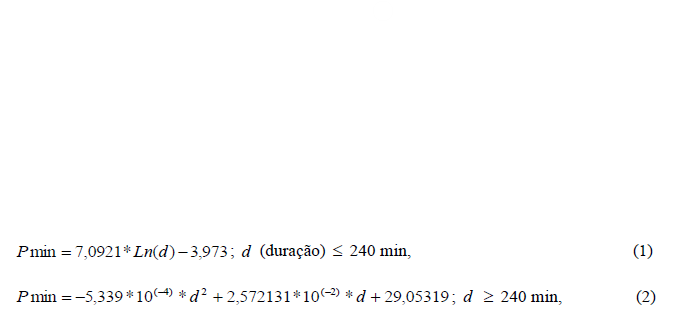

---



In [ ]:
#separar as chuvas de acordo com as durações